<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/1_PROYECTO_FINAL/Demo_Proyecto_Final_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importar librerías
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

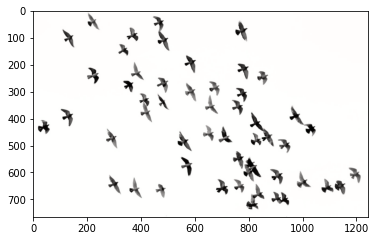

In [2]:
### Obtain Binary Image

#https://images.unsplash.com/photo-1675580547060-017aa077e749?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=435&q=80 -- MEJOR RESULTADO - 2 PECES FONDO NEGRO
#https://images.unsplash.com/photo-1676658751628-58f8105b16d6?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1121&q=80 -- MAS O MENOS IDENTIFICA LOS PECES.
#https://images.unsplash.com/photo-1515474594679-6a13c25afb99?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80 -- MUCHOS PECES - MAL RESULTADO, CASI NO DIFERENCIA CADA PEZ
#https://images.unsplash.com/photo-1542382156909-9ae37b3f56fd?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1243&q=80 -- AVES SEPARADAS FONDO UN SOLO COLOR . EXCELENTE RESULTADO
img = io.imread("https://images.unsplash.com/photo-1542382156909-9ae37b3f56fd?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1243&q=80")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

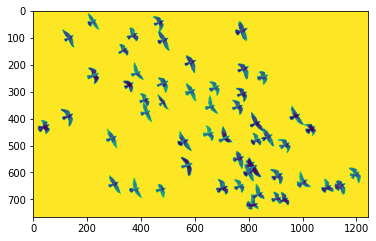

In [3]:
# Extract red channels -> it shows the highest contrast of nucleus from stroma and background
cells=img[:,:,2]
plt.imshow(cells)
plt.show()

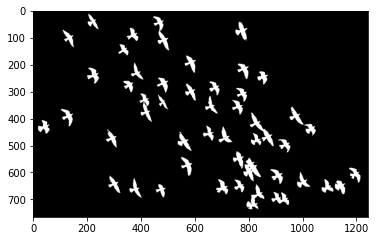

In [4]:
# Threshold image to binary using OTSU. Enforce inversion to set objects as 1 and background as 0.
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.show()

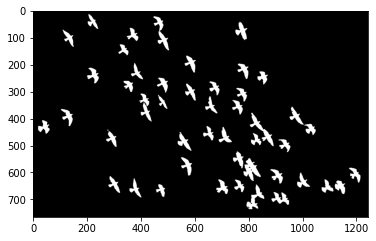

In [5]:
# Morphological operations to remove noise - opening
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
plt.imshow(opening,'gray')
plt.show()

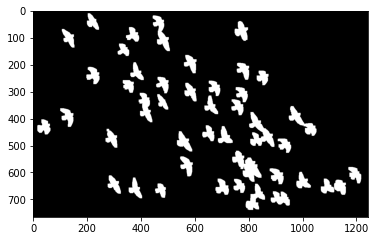

In [6]:
### Watershed Segmentation

# sure background
sure_bg = cv2.dilate(opening, kernel,iterations=3)
plt.imshow(sure_bg,'gray')
plt.show()

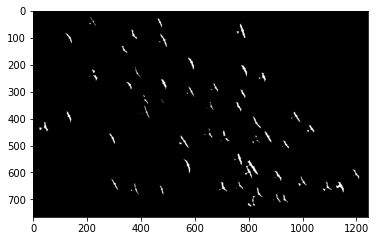

In [7]:
# sure foreground
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
plt.imshow(sure_fg,'gray')
plt.show()

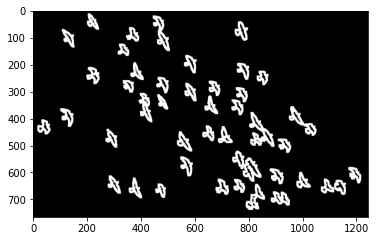

In [8]:
# Unknown region
sure_fg = np.uint8(sure_fg)  #Convert to uint8 from float
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,'gray')
plt.show()

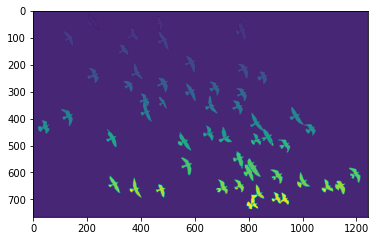

In [9]:
# markers
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0

# watershed 
markers = cv2.watershed(img,markers)

plt.imshow(markers)
plt.show()

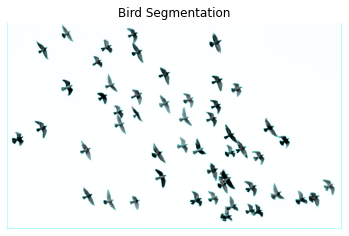

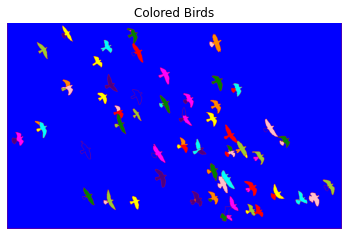

In [10]:
# segment birds
img[markers == -1] = [0,255,255]  
img2 = color.label2rgb(markers, bg_label=0)

# show results
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.title('Bird Segmentation')
plt.figure()
plt.imshow(img2)
plt.axis('off')
plt.title('Colored Birds')
plt.show()

Referencia:
* Sung, S. (2022. 5 enero). *Watershed Segmentation - detect individidual objects when heavily clustered*. Medium. https://medium.com/codex/watershed-segmentation-locate-individual-objects-when-heavily-clustered-b07bb1dbc0f6
